<center> <h1>Turnpike</h1> </center>
<center> <h2>Réalisation : Habibi Issam - Sajid Badr</h2> </center>


We consider the following optimal control problem:

$$ \int_0^{2} x^2(t)\,\mathrm{d}t \to \min, $$

where

$$ \dot{x}(t) = u(t),\quad |u(t)| \leq 1, $$

$$ x(0)=1,\quad x(2)=1/2. $$

<div class="alert alert-info">

**_Question._**
    
Solve the optimal control problem with `Jump` and `Ipopt`.
      
</div>

In [1]:
using JuMP, Ipopt

# Create JuMP model, using Ipopt as the solver
turnpike = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 5))

# Parameters
t0 = 0.    # initial time
tf = 2.    # final time
c0 = 0.    # Initial cost
x0 = 1.    # Initial position
xf = 0.5   # Final position

N  = 800    # Grid size
Δt = (tf-t0)/N  # Time step

#### TO COMPLETE 
#
# Define the variables (@variables), the objective (@objective), the limit constraints (@constraints)
# and the dynamic constraints (@NLconstraint)
#
# We consider the cost has an additional variable: c(0) = 0 and c(2) is free.
# The dynamics for the cost is dc = x^2 and the objective function is simple c(2)
#

@variables(turnpike, begin
        c[1:N]
        x[1:N]
        -1 <= u[1:N] <= 1
    end)

# Objective: maximize altitude at end of time of flight
@objective(turnpike, 
    Min, c[N]
)

# Initial conditions
@constraints(turnpike, begin
        c[1] == 0
        x[1] == x0
        x[N] == xf
    end)

# Dynamics
for j in 2:N   
    
    # cost dynamics
    @NLconstraint(turnpike,
        c[j] == c[j-1] + (1/2)*Δt*(x[j]^2 + x[j-1]^2)
    )

    # state dynamics
    @NLconstraint(turnpike,
        x[j] == x[j-1] + (1/2)*Δt*(u[j] + u[j-1])
# to complete
    )
end

#### END TO COMPLETE 

# Solve for the control and state
println("Solving...")
status = optimize!(turnpike)

# Display results
println("Solver status: ", status)
println("Minimum cost: ", objective_value(turnpike))

Solving...

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     6395
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     1598

Total number of variables............................:     2400
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      800
                     variables with only upper bounds:        0
Total numb

In [4]:
# Can visualize the state and control variables
#import Pkg; Pkg.add("Gadfly")
using Gadfly

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
  Installed Hexagons ────────── v0.2.0
  Installed Loess ───────────── v0.5.3
  Installed StructTypes ─────── v1.5.2
  Installed CategoricalArrays ─ v0.9.5
  Installed CoupledFields ───── v0.2.0
  Installed Gadfly ──────────── v1.3.2
Updating `~/.julia/environments/v1.5/Project.toml`
  [c91e804a] + Gadfly v1.3.2
Updating `~/.julia/environments/v1.5/Manifest.toml`
  [324d7699] + CategoricalArrays v0.9.5
  [7ad07ef1] + CoupledFields v0.2.0
  [c91e804a] + Gadfly v1.3.2
  [a1b4810d] + Hexagons v0.2.0
  [4345ca2d] + Loess v0.5.3
  [856f2bd8] + StructTypes v1.5.2
  [9fa8497b] + Future
┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1278


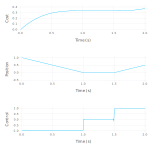

In [5]:
c_plot = plot(x = (1:N) * Δt, y = value.(c)[:], Geom.line,
                Guide.xlabel("Time (s)"), Guide.ylabel("Cost"))
x_plot = plot(x = (1:N) * Δt, y = value.(x)[:], Geom.line,
                Guide.xlabel("Time (s)"), Guide.ylabel("Position"))
u_plot = plot(x = (1:N) * Δt, y = value.(u)[:], Geom.line,
                Guide.xlabel("Time (s)"), Guide.ylabel("Control"))
draw(SVG(6inch, 6inch), vstack(c_plot, x_plot, u_plot))